In [67]:
#Initialisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [68]:
#S&P500 Index
sp = yf.Ticker("^GSPC")
#Nikkei Index
nikkei = yf.Ticker("^N225")
# Straits Times Index
sti = yf.Ticker("^STI")

# Retriving DF of the 3 tickers , forward fill to fill NAN entries and backfill to fill day 1 NAN entries
#COVID DF
covid_df = yf.download("^GSPC ^N225 ^STI", start="2020-01-18", end="2020-07-18")
covid_df = covid_df.fillna(method='ffill')
covid_df = covid_df.fillna(method='bfill')
covid_df = covid_df.reset_index()
covid_df = covid_df[['Date','Adj Close','High','Low']]
covid_df = covid_df.rename(columns={'Adj Close': 'Adj Close_COVID', 'Date':'Date_COVID','High':'High_COVID','Low':'Low_COVID'})

#SARS DF
sars_df = yf.download("^GSPC ^N225 ^STI", start="2003-02-08", end="2003-08-09")
sars_df = sars_df.fillna(method='ffill')
sars_df = sars_df.fillna(method='bfill')
sars_df = sars_df.reset_index()
sars_df = sars_df[['Date','Adj Close','High','Low']]
sars_df = sars_df.rename(columns={'Adj Close': 'Adj Close_SARS', 'Date':'Date_SARS','High':'High_SARS','Low':'Low_SARS'})

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


In [69]:
merged = covid_df.merge(sars_df, left_index = True, right_index = True)
merged

Date_COVID Adj Close_COVID                              High_COVID  \
                         ^GSPC         ^N225         ^STI        ^GSPC   
0   2020-01-17     3329.620117  24083.509766  3280.090088  3329.879883   
1   2020-01-20     3329.620117  24083.509766  3280.090088  3329.879883   
2   2020-01-21     3320.790039  23864.560547  3247.169922  3329.790039   
3   2020-01-22     3321.750000  24031.349609  3253.929932  3337.770020   
4   2020-01-23     3325.540039  23795.439453  3234.560059  3326.879883   
..         ...             ...           ...          ...          ...   
126 2020-07-13     3155.219971  22784.740234  2631.080078  3235.320068   
127 2020-07-14     3197.520020  22587.009766  2620.189941  3200.949951   
128 2020-07-15     3226.560059  22945.500000  2648.899902  3238.280029   
129 2020-07-16     3215.570068  22770.359375  2623.669922  3220.389893   
130 2020-07-17     3224.729980  22696.419922  2618.479980  3233.520020   

                                  Low_COVID                             \
            ^N225         ^STI        ^GSPC         ^N225         ^STI   
0    24108.109375  3283.060059  3318.860107  24061.669922  3270.800049   
1    24108.109375  3283.060059  3318.860107  24061.669922  3270.800049   
2    24081.750000  3275.149902  3316.610107  23843.480469  3232.989990   
3    24040.869141  3258.959961  3320.040039  23831.099609  3240.169922   
4    23910.009766  3259.899902  3301.870117  23779.230469  3231.370117   
..            ...          ...          ...           ...          ...   
126  22784.740234  2670.929932  3149.429932  22561.470703  2629.679932   
127  22677.019531  2631.810059  3127.659912  22538.779297  2604.949951   
128  22965.560547  2658.899902  3200.760010  22800.109375  2641.800049   
129  22925.900391  2661.949951  3198.590088  22739.419922  2621.020020   
130  22857.820312  2640.379883  3205.649902  22643.519531  2618.479980   

     Date_SARS Adj Close_SARS                             High_SARS  \
                        ^GSPC        ^N225         ^STI       ^GSPC   
0   2003-02-07     829.690002  8484.929688  1282.729980  845.729980   
1   2003-02-10     835.969971  8484.929688  1282.729980  837.159973   
2   2003-02-11     829.200012  8484.929688  1295.969971  843.020020   
3   2003-02-12     818.679993  8664.169922  1295.969971  832.119995   
4   2003-02-13     817.369995  8599.660156  1268.329956  821.250000   
..         ...            ...          ...          ...         ...   
126 2003-08-04     982.820007  9452.790039  1537.280029  985.750000   
127 2003-08-05     965.460022  9382.580078  1508.689941  982.820007   
128 2003-08-06     967.080017  9323.910156  1510.180054  975.739990   
129 2003-08-07     974.119995  9265.559570  1533.609985  974.890015   
130 2003-08-08     977.590027  9327.530273  1534.540039  980.570007   

                                 Low_SARS                            
           ^N225         ^STI       ^GSPC        ^N225         ^STI  
0    8502.360352  1286.770020  826.700012  8427.299805  1273.939941  
1    8502.360352  1286.770020  823.530029  8427.299805  1273.939941  
2    8502.360352  1303.219971  825.090027  8427.299805  1287.839966  
3    8676.530273  1303.219971  818.489990  8514.780273  1287.839966  
4    8672.990234  1288.989990  806.289978  8550.480469  1268.160034  
..           ...          ...         ...          ...          ...  
126  9538.940430  1548.380005  966.789978  9452.790039  1532.719971  
127  9459.160156  1547.329956  964.969971  9304.709961  1508.689941  
128  9375.429688  1520.520020  960.840027  9287.389648  1496.439941  
129  9334.559570  1543.020020  963.820007  9224.049805  1517.180054  
130  9367.639648  1541.719971  973.830017  9251.730469  1528.510010  

[131 rows x 20 columns]

In [108]:
def two_Yscales(ax1, ax2, days, data1, data2, label1, label2):
    ax2 = ax1.twinx()
    
    ax1.plot(days, data1, color='#003f5c')
    ax1.set_xlabel('Days')
    ax1.set_ylabel(label1)
    
    ax2.plot(days, data2, color='#ffa600')
    ax2.set_ylabel(label2)
    return ax1, ax2

def two_XYscales(ax1, ax2, days1, days2, data1, data2, label1, label2, label3, label4):
    #ax2 = ax1.twinx()
    #ax2 = ax1.twiny()
    
    ax1.plot(days1, data1, color='#003f5c')
    ax1.set_xlabel(label1)
    ax1.set_ylabel(label3)
    
    ax2.plot(days2, data2, color='#ffa600')
    ax2.set_xlabel(label2)
    ax2.set_ylabel(label4)

    return ax1, ax2

def color_y_axis(ax, color):
    """Color the axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

def color_x_axis(ax, color):
    """Color the axes."""
    for t in ax.get_xticklabels():
        t.set_color(color)
    return None

In [109]:
#pull out COVID GSPC column
covid_GSPC =  merged.iloc[:,[1],]
covid_GSPC_rolling = covid_GSPC.rolling(window=7).mean()

#pull out SARS GSPC column
sars_GSPC = merged.iloc[:,[11],]
sars_GSPC_rolling = sars_GSPC.rolling(window=7).mean()

#pull out COVID N225 column
covid_N225 =  merged.iloc[:,[2],]
covid_N225_rolling = covid_N225.rolling(window=7).mean()

#pull out SARS N225 column
sars_N225 = merged.iloc[:,[12],]
sars_N225_rolling = sars_N225.rolling(window=7).mean()

#pull out COVID STI column
covid_STI =  merged.iloc[:,[3],]
covid_STI_rolling = covid_STI.rolling(window=7).mean()

#pull out SARS STI column
sars_STI = merged.iloc[:,[13],]
sars_STI_rolling = sars_STI.rolling(window=7).mean()

#pull out COVID High-Low STI column
covid_STIFLUC = merged.iloc[:,6]-merged.iloc[:,9]
covid_STIFLUC_rolling = covid_STIFLUC.rolling(window=7).mean()

#pull out SARS High-Low STI column
sars_STIFLUC = merged.iloc[:,16]-merged.iloc[:,19]
sars_STIFLUC_rolling = sars_STIFLUC.rolling(window=7).mean()

#pull out COVID High-Low N225 column
covid_N225FLUC = merged.iloc[:,5]-merged.iloc[:,8]
covid_N225FLUC_rolling = covid_N225FLUC.rolling(window=7).mean()

#pull out SARS High-Low N225 column
sars_N225FLUC = merged.iloc[:,15]-merged.iloc[:,18]
sars_N225FLUC_rolling = sars_N225FLUC.rolling(window=7).mean()

#pull out COVID High-Low GSPC column
covid_GSPCFLUC = merged.iloc[:,4]-merged.iloc[:,7]
covid_GSPCFLUC_rolling = covid_GSPCFLUC.rolling(window=7).mean()

#pull out SARS High-Low GSPC column
sars_GSPCFLUC = merged.iloc[:,14]-merged.iloc[:,17]
sars_GSPCFLUC_rolling = sars_GSPCFLUC.rolling(window=7).mean()


days1 = [i for i in range(len(merged.iloc[:,[0],]))]
days2 = [i for i in range(len(merged.iloc[:,[10],]))]


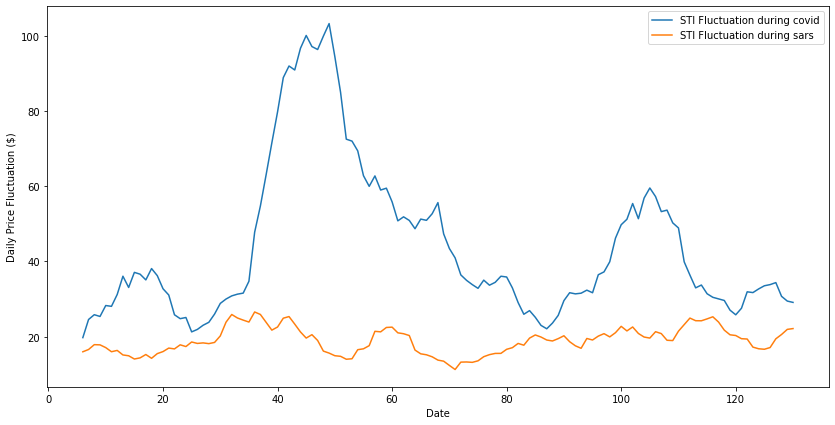

In [120]:
#plot multi axes graph
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(days1, covid_STIFLUC_rolling, label='STI Fluctuation during covid')
ax.plot(days2, sars_STIFLUC_rolling, label='STI Fluctuation during sars')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Price Fluctuation ($)')
#ax1, ax2 = two_XYscales(ax, ax, days1, days2, covid_STIFLUC_rolling, sars_STIFLUC_rolling, 'Time', 'Time', 'STI COVID Fluctuation', 'STI SARS Fluctuation')
#color_y_axis(ax1, '#003f5c')
#color_y_axis(ax2, '#ffa600')
#color_x_axis(ax1, '#003f5c')
#color_x_axis(ax2, '#ffa600')
ax.legend()

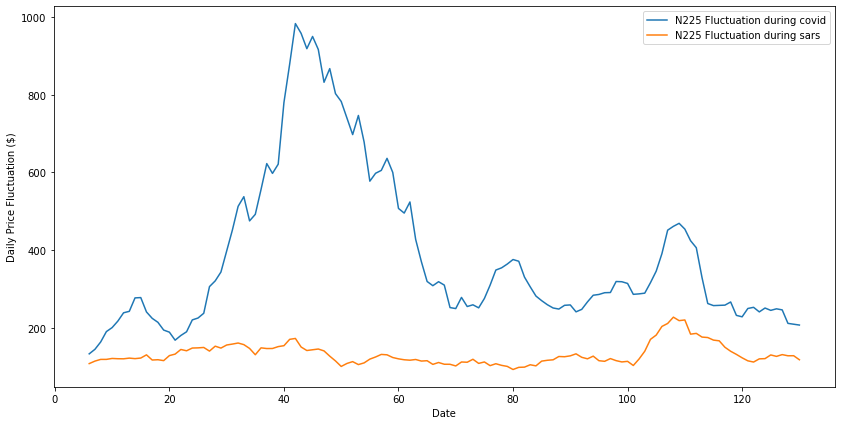

In [122]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(days1, covid_N225FLUC_rolling, label='N225 Fluctuation during covid')
ax.plot(days2, sars_N225FLUC_rolling, label='N225 Fluctuation during sars')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Price Fluctuation ($)')
ax.legend()
#ax1, ax2 = two_XYscales(ax, ax, days1, days2, covid_N225FLUC_rolling, sars_N225FLUC_rolling, 'Time', 'Time', 'N225 COVID Fluctuation', 'N225 SARS Fluctuation')
#color_y_axis(ax1, '#003f5c')
#color_y_axis(ax2, '#ffa600')
#color_x_axis(ax1, '#003f5c')
#color_x_axis(ax2, '#ffa600')

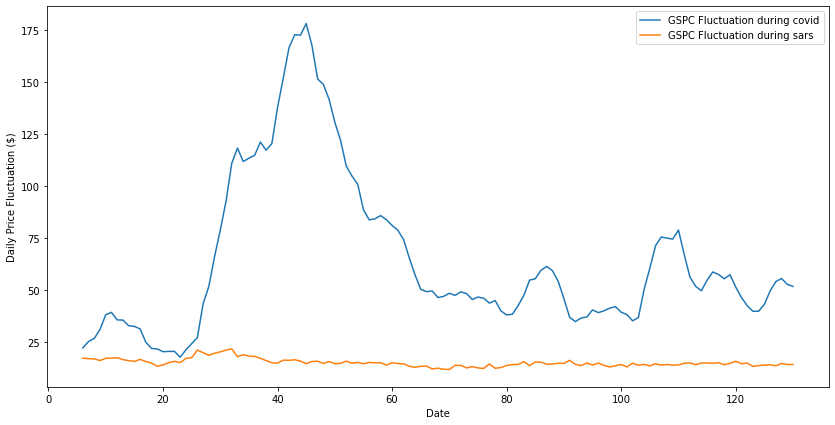

In [123]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(days1, covid_GSPCFLUC_rolling, label='GSPC Fluctuation during covid')
ax.plot(days2, sars_GSPCFLUC_rolling, label='GSPC Fluctuation during sars')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Price Fluctuation ($)')
ax.legend()
#ax1, ax2 = two_XYscales(ax, ax, days1, days2, covid_GSPCFLUC_rolling, sars_GSPCFLUC_rolling, 'Time', 'Time', 'GSPC COVID Fluctuation', 'GSPC SARS Fluctuation')
#color_y_axis(ax1, '#003f5c')
#color_y_axis(ax2, '#ffa600')
#color_x_axis(ax1, '#003f5c')
#color_x_axis(ax2, '#ffa600')